# Big Ideas Final Project

---

### Introduction: Finding the answer to "Best Neighborhood in Pittsburgh" is a tricky one, but when it comes down to it, we decided that it was most important to find a neighborhood that is geared towards Best neighborhood to raise a family based on submetrics geared towards education, safety, and nearby parks.

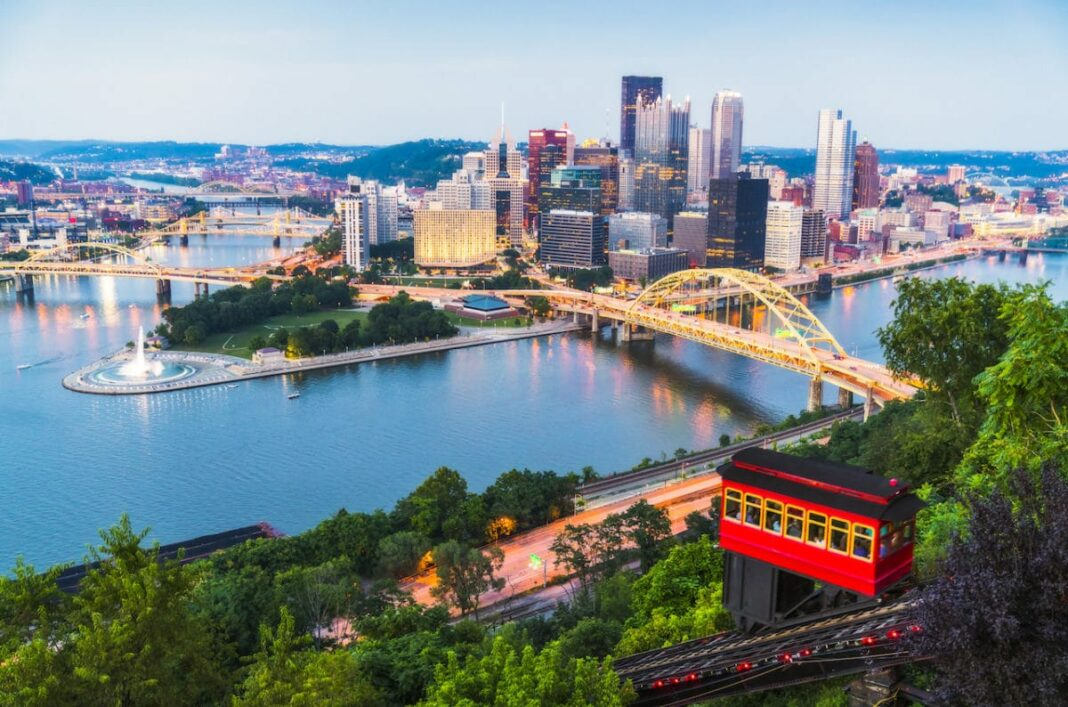


Submetrics: 
* Schools : https://data.wprdc.org/dataset/pittsburgh-public-school-locations
* Crime Rates : https://data.wprdc.org/dataset/uniform-crime-reporting-data
* Recreation :  https://data.wprdc.org/dataset/parks


---


In [55]:
import pandas as pd

## Introduction
We chose to find the best neighborhood to raise a child
We based our best neighborhood on the following submetrics:
* Lowest crime rate
* Education
* Recreation

## Our findings
### Schools:
    The 10 best schools in Pittsburgh are located in the following neighborhoods:


In [56]:
schools_df = pd.read_csv('export_schools.csv')
schools_df['Points'] = 100 - schools_df.index
schools_df = schools_df[['Neighborhood', 'Points']]
display(schools_df.head(10))

,Neighborhood,Points
0,Point Breeze,100
1,Point Breeze North,99
2,Squirrel Hill North,98
3,Homewood North,97
4,Regent Square,96
5,Squirrel Hill South,95
6,Homewood South,94
7,Highland Park,93
8,Shadyside,92
9,East Hills,91


### Parks:
    The 10 best schools in Pittsburgh are located in the following neighborhoods:

In [57]:
parks_df = pd.read_csv('export_parks.csv')
parks_df['Points'] = 100 - parks_df.index
parks_df = parks_df[['Neighborhood', 'Points']]
display(parks_df.head(10))

,Neighborhood,Points
0,Squirrel Hill South,100
1,East Liberty,99
2,Squirrel Hill North,98
3,Regent Square,97
4,Beechview,96
5,Fineview,95
6,Allegheny Center,94
7,South Side Slopes,93
8,Hazelwood,92
9,Sheraden,91


### Crime:
    The 10 best schools in Pittsburgh are located in the following neighborhoods:

In [58]:
crime_df = pd.read_csv('export_crime.csv')
crime_df['Points'] = 100 - crime_df.index
crime_df = crime_df[['Neighborhood', 'Points']]
display(crime_df.head(10))

,Neighborhood,Points
0,Mount Oliver,100
1,Ridgemont,99
2,Chartiers City,98
3,New Homestead,97
4,East Carnegie,96
5,Swisshelm Park,95
6,Summer Hill,94
7,Mount Oliver,93
8,Regent Square,92
9,Hays,91


In [60]:
combined_df = pd.merge(schools_df, parks_df, on='Neighborhood', how='outer')
combined_df = pd.merge(combined_df, crime_df, on='Neighborhood', how='outer')

combined_df = combined_df.fillna(0)

combined_df['Total Points'] = combined_df['Points_x'] + combined_df['Points_y'] + combined_df['Points']

combined_df = combined_df.sort_values(by=['Total Points'], ascending=False).reset_index(drop=True)
combined_df = combined_df[['Neighborhood', 'Total Points']]

# Display the DataFrame
display(combined_df.head(10))

,Neighborhood,Total Points
0,Regent Square,285.0
1,Swisshelm Park,238.0
2,Squirrel Hill North,234.0
3,New Homestead,231.0
4,Fairywood,227.0
5,Perry North,223.0
6,Allegheny Center,222.0
7,Beltzhoover,220.0
8,Hays,218.0
9,Garfield,213.0
